In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving actions.csv to actions.csv
Saving clients.csv to clients.csv
Saving transactions.csv to transactions.csv


In [3]:
clients = pd.read_csv('clients.csv')
actions = pd.read_csv('actions.csv')
transactions = pd.read_csv('transactions.csv')

In [4]:
merged_ac = pd.merge(actions, clients, on='client_id')

In [5]:
merged_ac.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,...,client_country,client_gender,client_nationality,client_city,client_segment,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,...,NaN,NaN,NaN,NaN,0,0,0,1,1,1
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,...,FR,NaN,NaN,NaN,0,0,0,0,1,1
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,...,IT,NaN,NaN,NaN,0,0,0,0,1,1
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,...,JP,NaN,NaN,NaN,0,0,0,0,1,1


In [6]:
merged_ac['client_is_present'].value_counts()

1    5437
0    4563
Name: client_is_present, dtype: int64

<ipython-input-7-e92e1bc3f93a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_ac.corr()


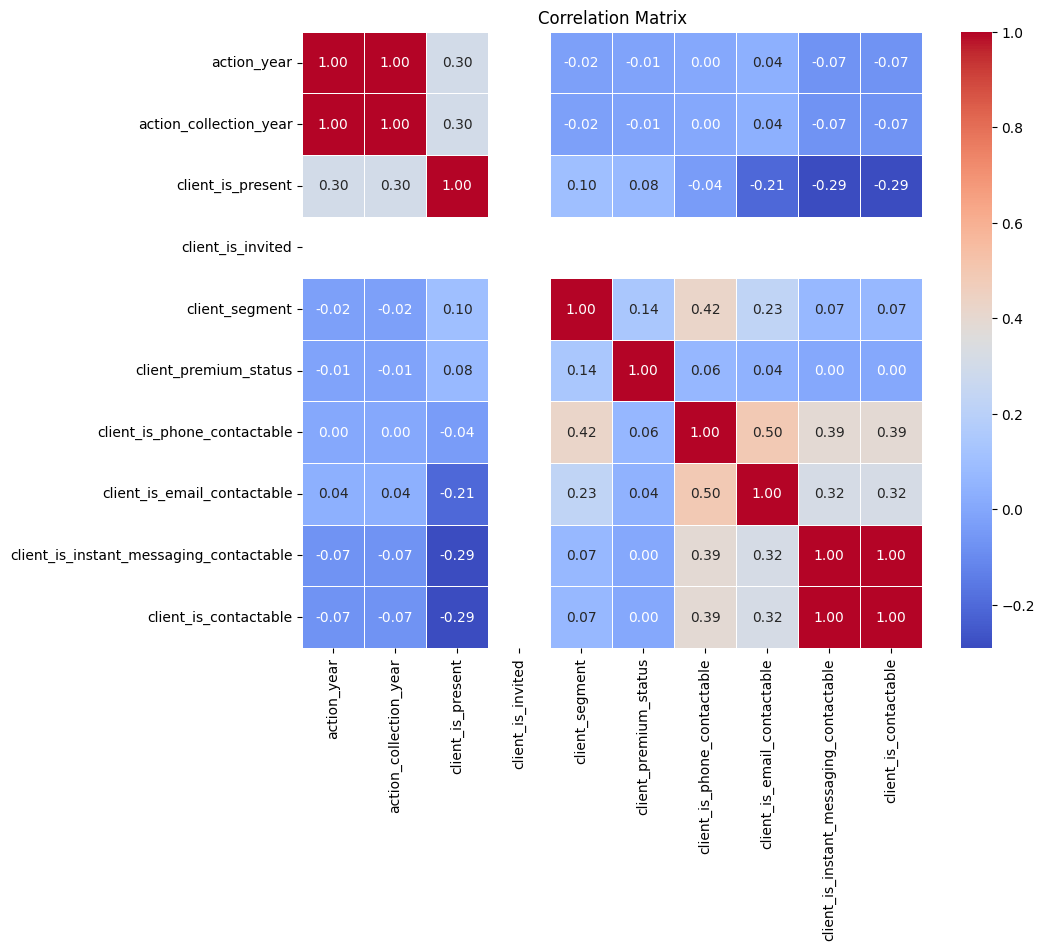

In [7]:
correlation_matrix = merged_ac.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

In [8]:
attendance_rates = merged_ac.groupby('client_gender').apply(lambda x: x['client_is_present'].sum() / x['client_is_invited'].sum()).reset_index()
attendance_rates.columns = ['client_gender', 'attendance_rate']

attendance_rates.sort_values(by='attendance_rate', ascending=False)


,client_gender,attendance_rate
2,N,0.960784
0,F,0.704671
1,M,0.656811
3,U,0.000000


In [9]:
merged_ac['client_gender'].value_counts()

F    3982
M     947
N      51
U       1
Name: client_gender, dtype: int64

In [10]:
attendance_rates = merged_ac.groupby('client_country').apply(lambda x: x['client_is_present'].sum() / x['client_is_invited'].sum()).reset_index()
attendance_rates.columns = ['client_country', 'attendance_rate']

attendance_rates.sort_values(by='attendance_rate', ascending=False)


,client_country,attendance_rate
0,AD,1.0
41,HN,1.0
80,PF,1.0
58,KZ,1.0
30,DO,1.0
...,...,...
95,SN,0.0
48,IO,0.0
8,AW,0.0
21,CM,0.0


In [11]:
merged_ac['client_country'].value_counts()

AE    2732
IT    1157
US     969
GB     624
SG     601
      ... 
NG       1
NZ       1
SI       1
MN       1
CM       1
Name: client_country, Length: 105, dtype: int64

In [12]:
attendance_rates = merged_ac.groupby('client_segment').apply(lambda x: x['client_is_present'].sum() / x['client_is_invited'].sum()).reset_index()
attendance_rates.columns = ['client_segment', 'attendance_rate']

attendance_rates.sort_values(by='attendance_rate', ascending=False)


,client_segment,attendance_rate
7,7,0.906542
6,6,0.886957
8,8,0.857143
1,1,0.693671
2,2,0.687500
4,4,0.555118
0,0,0.546918
5,5,0.480720
3,3,0.380876


In [13]:
merged_ac['client_segment'].value_counts()

3    3723
0    2920
6    1035
1     790
4     508
2     400
5     389
7     214
8      21
Name: client_segment, dtype: int64

In [14]:
attendance_rates = merged_ac.groupby('client_id').apply(lambda x: x['client_is_present'].sum() / x['client_is_invited'].sum()).reset_index()
attendance_rates.columns = ['client_id', 'attendance_rate']

attendance_rates.sort_values(by='attendance_rate', ascending=False)


,client_id,attendance_rate
5960,c66477614,1.0
3233,c35905974,1.0
3133,c34848518,1.0
3132,c34842461,1.0
5210,c57977502,1.0
...,...,...
3981,c44044174,0.0
3980,c44022823,0.0
3979,c44008401,0.0
3977,c43992492,0.0


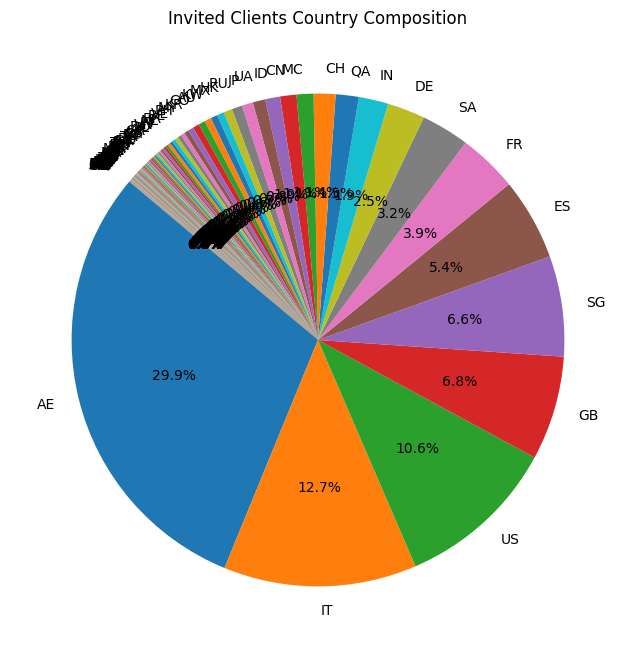

In [21]:
country_counts = merged_ac['client_country'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Invited Clients Country Composition')
plt.show()

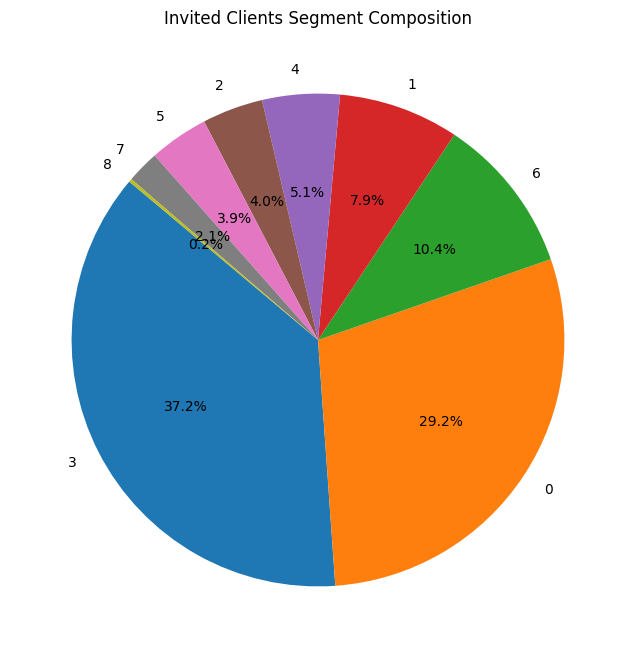

In [19]:
segment_counts = merged_ac['client_segment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Invited Clients Segment Composition')
plt.show()

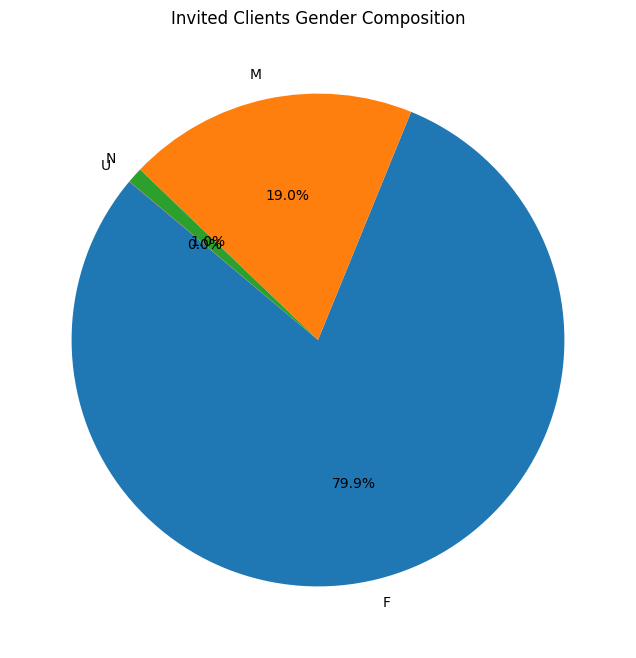

In [20]:
gender_counts = merged_ac['client_gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Invited Clients Gender Composition')
plt.show()